In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
data_path = "train/"

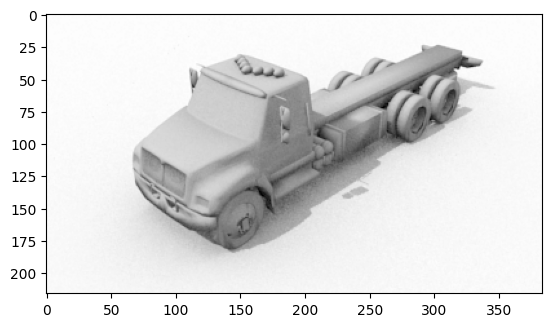

In [5]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Resize((216 ,384))])
train_set = torchvision.datasets.ImageFolder(
    root= data_path, transform=transform
)
batch_size = 128

trainloader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

img = next(iter(trainloader))[0][0]

plt.imshow(img.permute(1, 2, 0).numpy())

In [6]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, input_dim=3*216*384, output_dim=12):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
          x = x.view(x.size(0), -1)
          x = self.linear(x)
          return x

In [7]:
model  = LinearClassifier()
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [8]:
classes = np.arange(0, 12, 1)
dataiter = iter(trainloader)
images, labels = next(dataiter)

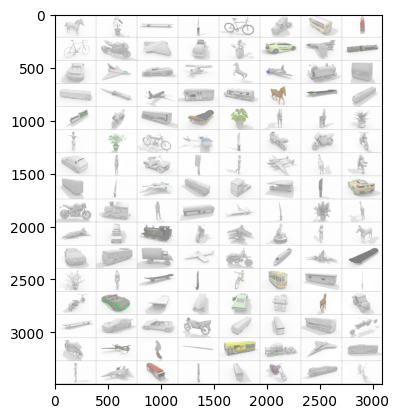

In [9]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0))) #Cette ligne utilise la fonction plt.imshow de Matplotlib pour afficher 
  #l'image. np.transpose(npimg, (1, 2, 0)) transpose les dimensions de l'array NumPy npimg 
  #pour qu'elles correspondent au format attendu par imshow (largeur x hauteur x canaux).
  plt.show()

imshow(torchvision.utils.make_grid(images))

In [10]:
print(labels)

tensor([ 4,  8,  9,  5,  1, 11,  2, 10,  1,  6,  0,  3,  8,  3,  0, 10,  3,  0,
         3,  0,  4,  0, 10,  2,  2,  5,  0,  2,  2,  4,  9, 10, 10,  6,  2,  9,
         8,  4,  7,  8,  7,  8,  6,  0,  5,  6,  6,  6,  3,  7,  3,  5,  7,  0,
         4,  7,  2,  5,  0,  2, 11,  9,  5,  3,  6, 10,  7,  2,  0,  5,  8,  4,
         0,  3, 10,  6,  0,  8,  7,  4,  3,  2, 11,  0,  6, 10,  0,  9,  8,  7,
         9,  5,  1, 10,  2,  5,  6,  3,  9,  9,  3, 11,  4,  3,  9,  3,  3,  6,
         2,  2,  2,  6,  6,  0,  5,  5,  2, 11,  0,  2,  7,  0,  2,  5, 11,  6,
        10,  1])


In [11]:
all_loss = []
for epoch in range(12):
    temp_loss = []
    for images, labels in trainloader:
        # Encoder les labels en one-hot
        one_hot_labels = F.one_hot(labels, num_classes=12).to(torch.long)
        # Réinitialiser les gradients
        optimizer.zero_grad()
        # Calculer les sorties du modèle
        output = model(images)
        # Convertir les étiquettes encodées en one-hot en type torch.long
        labels = torch.argmax(one_hot_labels, dim=1)
        # Calculer la perte en utilisant les sorties et les étiquettes converties en torch.long
        loss = criterion(output, labels)
        # Rétropropagation et mise à jour des poids
        loss.backward()
        optimizer.step()

        temp_loss.append(loss.item())

    all_loss.append(np.mean(temp_loss))
    print(f"Epoch: {epoch}, loss: {np.mean(temp_loss)}")